- Catboost : https://arxiv.org/pdf/1706.09516.pdf
- ML + DL Ensemble Paper : https://watermark.silverchair.com/bbab377.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA1EwggNNBgkqhkiG9w0BBwagggM-MIIDOgIBADCCAzMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM0fASeLk87J6UbXr-AgEQgIIDBJ0fNQe6bUjDjSPucIuyPchEWZC1KTzzzley12pfORj9wN688i2Lp5dZz12Qv8h8WQjlU0r3pCn0VzbnXrogp0eMzaNO-JHzS0aUuFL-ayhr_o8YL1-5CngvBm-9eKjE2tjglC-sbKaX7gT0-Bz-pKIrWTI6yldV2ZNqcAqe8i8GHLhm0Pm2Q7pwMNrya0oUOMDumi8xzucRKbgS0J1z0ftUWJpfX95s6z7jZ3m0_IRe-XRK23VbLcVMWOmcbp4az3wL1n6T4_9hgenDuc0ivz80ZQn1mpcoMIhBSw7guVGdTPNDIg4-LmtftZDcdvBb0sNzqLLsCjh4_R9g_4On0PqGEX7-P7qrKXNwMaA6O3__wBj80s8N2XDAyVSqpXpM4qTMaOJFNb96BTx16rji3tI9EcaMixupjSVTZp6f10q-mfG6ztM7PZqEhJ8YnxmZzEd9I1YIX0ZIc4l0vlKn3dskGpWzGOT8w1afSvlhmCEkSaFda9LF2q0__ZEqLPpVEsCUYhpmD00eFt3ojZo7J2lplQjrfy7ydOJipr5N4-kw3z3x4Na2gYfOuxUjsOmDv8oLMJRA6AZPmI-H2qSs3KF3vjZuXp-FZCZospeZntQlCqopH7Yp8InlsjQio4BdwHa5dp1w2txVSiL3PFDcCapIf4nQWXmkQpoHfMTl3U4u8ZZgJYD_r0u3etrcTj_Y-XRJezFBsJLO02TJu8CoNmcEa65OLGb7-LSfOqKNcUAD66Yxoia638eZFUApBU4FQoWpgVwZ0wn9p0ptDuIvC7lJnR0bZmY8kZ6_UeMrAqzE7Kry-AeN6m4RtVErVnYwLjBfqunyLHZNnvdT5pmYEhh7BGDTQlY6GdFM7a5dCR6MKXyvS-Spzc_2k7XXSXnlhIe8d5o1fdPtHYaHb8uRk78SHx8cGge3ZujibTE26GMJb4lPv0nTIfi6o7CJ5u2U4mRBuMBQURdqmUKPDeKB2dUx5aRil3feloFCX3H2BQxIp2HRIaDyRY9Ku4dUd_UMAKcovTs

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category = UserWarning)
pd.options.mode.chained_assignment = None

In [2]:
books = pd.read_csv('./code/data/books.csv')
users = pd.read_csv('./code/data/users.csv')
rating_train = pd.read_csv('./code/data/train_ratings.csv')
rating_test = pd.read_csv('./code/data/test_ratings.csv')
print(books.shape, users.shape, rating_train.shape, rating_test.shape)

(149570, 10) (68092, 3) (306795, 3) (76699, 3)


In [45]:
user_rating = users.merge(rating_train, how = 'left', on = 'user_id')
book_rating = books.merge(rating_train, how = 'left', on = 'isbn')
display(user_rating.head(2), book_rating.head(2))

,user_id,location,age,new_age,isbn,rating
0,8,"timmins, ontario, canada",NaN,NaN,0002005018,4.0
1,8,"timmins, ontario, canada",NaN,NaN,074322678X,4.0


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,8.0,4.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,67544.0,7.0


## `age`

In [46]:
user_rating['new_age'] = (user_rating['age'] // 10 * 10)

age_rating = user_rating[['new_age', 'rating']].dropna()
age_rating

,new_age,rating
7,40.0,9.0
8,40.0,6.0
9,40.0,7.0
10,40.0,7.0
11,40.0,5.0
...,...,...
315078,40.0,3.0
315079,50.0,7.0
315080,70.0,8.0
315082,30.0,10.0


In [29]:
from scipy.stats import f_oneway

# ANOVA 수행
result = f_oneway(*[group['rating'] for name, group in age_rating.groupby('new_age')])

# 결과 출력
print('-------------------- ANOVA TEST --------------------')
print('H0 : 연령대 간 Rating의 평균이 동일하다.')
print('H1 : 연령대 간 Rating의 평균이 적어도 하나는 동일하지 않다.\n')

print(f'F-statistic : {result.statistic:.5f}')
print(f'p-value : {result.pvalue}\n')

# p-value를 기반으로 한 유의성 검정
alpha = 0.05
if result.pvalue < alpha :
    print('H0 기각. 연령대 간 Rating의 평균이 적어도 하나는 동일하지 않다.')
else:
    print('H0 채택. 연령대 간 Rating의 평균이 동일하다.')


-------------------- ANOVA TEST --------------------
H0 : 연령대 간 Rating의 평균이 동일하다.
H1 : 연령대 간 Rating의 평균이 적어도 하나는 동일하지 않다.

F-statistic : 58.92791
p-value : 2.49362383368452e-108

H0 기각. 연령대 간 Rating의 평균이 적어도 하나는 동일하지 않다.


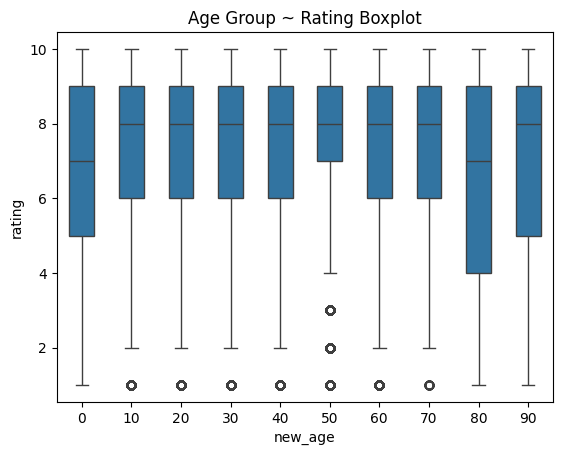

In [35]:
ax = sns.boxplot(x = 'new_age', y = 'rating', data = user_rating, width = 0.5)
ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age Group ~ Rating Boxplot')
plt.show()

## `year`

In [58]:
def preprocess_year(x) :
    if x <= 1970 :
        return 1970
    elif (x > 1970) and (x <= 1980) :
        return 1980
    elif (x > 1980) and (x <= 1985) :
        return 1985
    elif (x > 1985) and (x <= 1990) :
        return 1990
    elif (x > 1990) and (x <= 1995) :
        return 1995
    elif (x > 1995) and (x <= 2000) :
        return 2000
    else:
        return 2006
    
book_rating['year'] = book_rating['year_of_publication'].apply(preprocess_year)

year_rating = book_rating[['year', 'rating']].dropna()
year_rating

,year,rating
0,2006,4.0
1,2006,7.0
2,2006,8.0
3,2006,8.0
4,2006,9.0
...,...,...
326582,2006,7.0
326583,1990,6.0
326585,1985,7.0
326586,2000,7.0


In [60]:
from scipy.stats import f_oneway

# ANOVA 수행
result = f_oneway(*[group['rating'] for name, group in year_rating.groupby('year')])

# 결과 출력
print('-------------------- ANOVA TEST --------------------')
print('H0 : 출판년도 그룹 간 Rating의 평균이 동일하다.')
print('H1 : 출판년도 그룹 간 Rating의 평균이 적어도 하나는 동일하지 않다.\n')

print(f'F-statistic : {result.statistic:.5f}')
print(f'p-value : {result.pvalue}\n')

# p-value를 기반으로 한 유의성 검정
alpha = 0.05
if result.pvalue < alpha :
    print('H0 기각. 출판년도 그룹 간 Rating의 평균이 적어도 하나는 동일하지 않다.')
else:
    print('H0 채택. 출판년도 그룹 간 Rating의 평균이 동일하다.')


-------------------- ANOVA TEST --------------------
H0 : 출판년도 그룹 간 Rating의 평균이 동일하다.
H1 : 출판년도 그룹 간 Rating의 평균이 적어도 하나는 동일하지 않다.

F-statistic : 66.49107
p-value : 5.347374704534725e-83

H0 기각. 출판년도 그룹 간 Rating의 평균이 적어도 하나는 동일하지 않다.


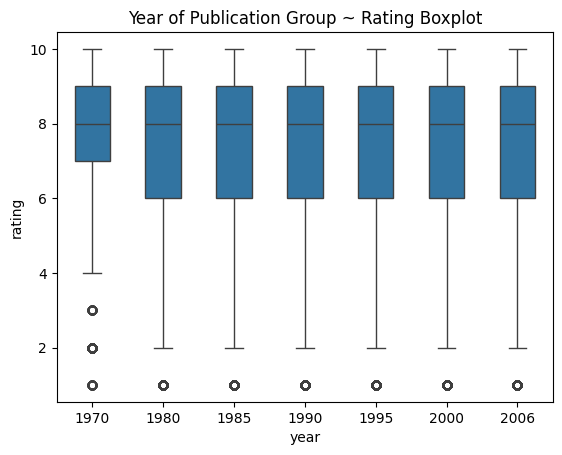

In [62]:
ax = sns.boxplot(x = 'year', y = 'rating', data = year_rating, width = 0.5)
# ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Year of Publication Group ~ Rating Boxplot')
plt.show()

## `language`

In [66]:
books['language'].nunique()

26

In [79]:
lang_cnt = books['language'].value_counts().to_frame('count').reset_index()
lang_cnt.head(3)

,language,count
0,en,78823
1,de,1282
2,es,1017


In [110]:
region_code = set([code[:1] for code in books['isbn']])

region_lang = dict()

for code in region_code :
    lang = books.loc[books['isbn'].str.startswith(str(code)), 'language']
    mode = lang.mode()[0] if not code == 'B' else 'en' # 'B'로 시작하는 행들은 모두 NaN여서, 'en'으로 대체
    region_lang[code] = mode
    
print(dict(sorted(region_lang.items())))

{'0': 'en', '1': 'en', '2': 'fr', '3': 'de', '4': 'en', '5': 'en', '7': 'zh-CN', '8': 'es', '9': 'es', 'B': 'en'}


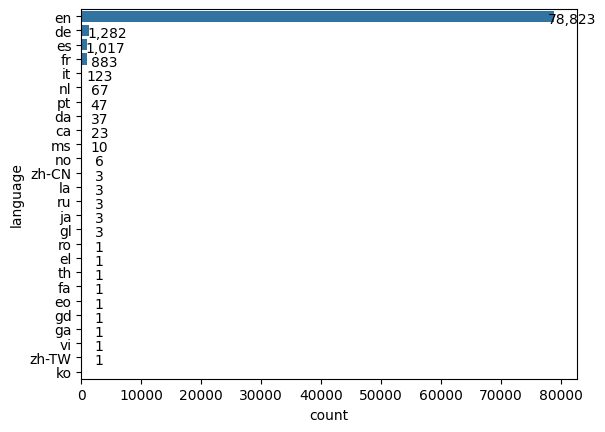

In [111]:
ax = sns.barplot(x = 'count', y = 'language', data = lang_cnt, orient = 'h')

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_width()),
                (p.get_width() + 3000, p.get_y() + 2 * p.get_height()),
                ha = 'center', va = 'bottom', xytext = (0, 5),
                textcoords = 'offset points', fontsize = 10)

# LB Score

In [210]:
cat_score = pd.DataFrame(data = {'timestamp' : ['12/14', '12/15', '12/18', '12/19', '12/20', '12/21'],
                                 'score' : [2.2369, 2.1850, 2.1279, 2.1250, 2.1235, 2.1226],
                                 'label' : ['Catboost', 'Catboost + 10-Fold', 'Remove `Rating_AVG`', 'Using `isbn_country`', 'Using Origin `Publisher`',
                                            'Using `isbn_country`\n+ Origin `Publisher`']})

dl_score = pd.DataFrame(data = {'timestamp' : ['12/20', '12/20', '12/21'],
                                'score' : [2.1739, 2.2211, 2.1181],
                                'label' : ['CNN_FM HPO', 'DeepCoNN HPO', 'Ensemble']})
dl_score

,timestamp,score,label
0,12/20,2.1739,CNN_FM HPO
1,12/20,2.2211,DeepCoNN HPO
2,12/21,2.1181,Ensemble


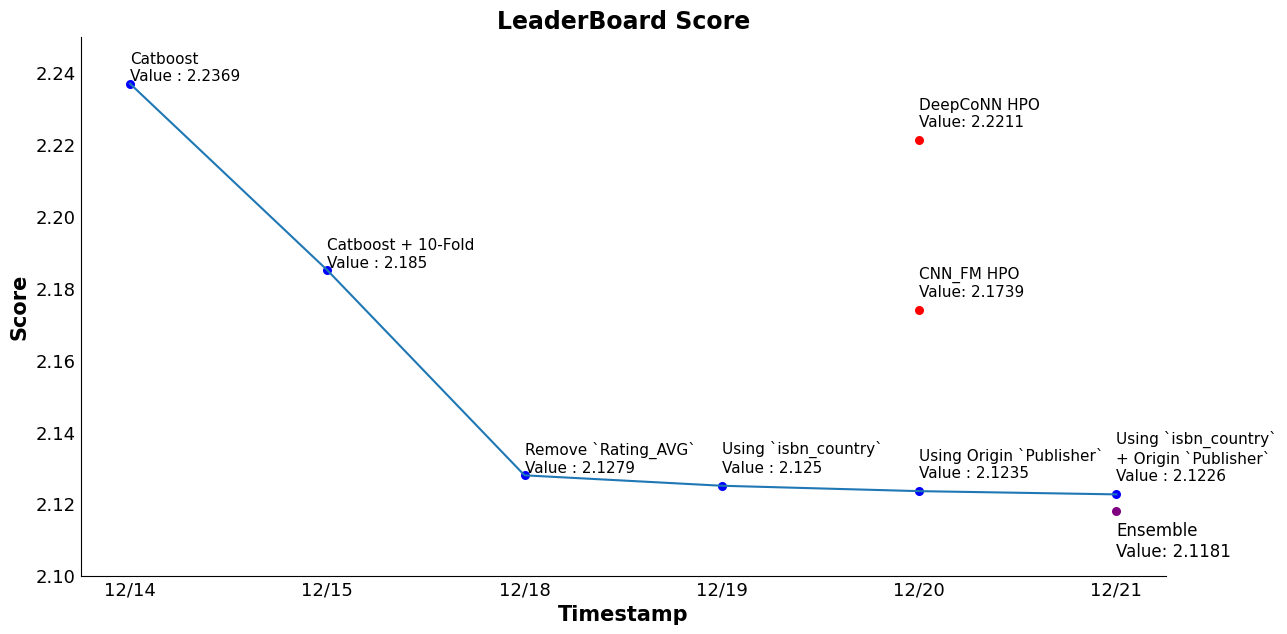

In [222]:
fig, ax = plt.subplots(figsize = (14, 7))

ax = sns.lineplot(x = 'timestamp', y = 'score', data = cat_score)

for index, row in cat_score.iterrows() :
    if index <= 2 : 
        ax.text(row['timestamp'], row['score'], f"{row['label']}\nValue : {row['score']}", ha = 'left', va = 'bottom', fontsize = 11)
        ax.scatter(row['timestamp'], row['score'], color = 'blue', s = 30, marker = 'o')
    else :
        ax.text(row['timestamp'], row['score'] + 0.003, f"{row['label']}\nValue : {row['score']}", ha = 'left', va = 'bottom', fontsize = 11)
        ax.scatter(row['timestamp'], row['score'], color = 'blue', s = 30, marker = 'o')

# Add text for dl_score DataFrame
for index, row in dl_score.iterrows() :
    if index <= 1 : 
        ax.text(row['timestamp'], row['score'] + 0.003, f"{row['label']}\nValue: {row['score']}", ha = 'left', va = 'bottom', fontsize = 11)
        ax.scatter(row['timestamp'], row['score'], color = 'red', s = 30, marker = 'o')
    else : 
        ax.text(row['timestamp'], row['score'] - 0.003, f"{row['label']}\nValue: {row['score']}", ha = 'left', va = 'top', fontsize = 12)
        ax.scatter(row['timestamp'], row['score'], color = 'purple', s = 30, marker = 'o')

ax.set_ylim([2.10, 2.25])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Timestamp', fontsize = 15, fontweight = 'semibold')
ax.set_ylabel('Score', fontsize = 15, fontweight = 'semibold')
ax.tick_params(axis = 'x', length = 0, labelsize = 13)
ax.tick_params(axis = 'y', length = 0, labelsize = 13)


plt.title('LeaderBoard Score', fontsize = 17, fontweight = 'bold')
plt.show()